In [84]:
# Required Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

os.makedirs("outputs", exist_ok=True)
os.makedirs("csv_files", exist_ok=True)

print("     required library is imported succefully ")
print('='*50)

     required library is imported succefully 


In [85]:
# readlig csv files using pandas
try:
  fear_greed=pd.read_csv('fear_greed_index.csv')
  trades=pd.read_csv('historical_data.csv')

  print("data ready to analysis")

# Knowing data (csv files )
  print("\nfiles data shape is")
  print('\n fear_greed file size',fear_greed.shape)
  print('\n Trades file size',trades.shape)
except FileNotFoundError:
  print("please upload file to google collabe correctly ")



data ready to analysis

files data shape is

 fear_greed file size (2644, 4)

 Trades file size (211224, 16)


In [86]:
print(fear_greed.dtypes)
print('\n',trades.dtypes)

timestamp          int64
value              int64
classification    object
date              object
dtype: object

 Account              object
Coin                 object
Execution Price     float64
Size Tokens         float64
Size USD            float64
Side                 object
Timestamp IST        object
Start Position      float64
Direction            object
Closed PnL          float64
Transaction Hash     object
Order ID              int64
Crossed                bool
Fee                 float64
Trade ID            float64
Timestamp           float64
dtype: object


In [87]:
print(trades['Coin'].unique())




['@107' 'AAVE' 'DYDX' 'AIXBT' 'GMX' 'EIGEN' 'HYPE' 'SOL' 'SUI' 'DOGE'
 'ETH' 'kPEPE' 'TRUMP' 'ONDO' 'ENA' 'LINK' 'XRP' 'S' 'BNB' 'BERA' 'WIF'
 'LAYER' 'MKR' 'KAITO' 'IP' 'JUP' 'USUAL' 'ADA' 'BTC' 'PURR/USDC' 'ZRO'
 '@7' '@19' '@21' '@44' '@48' '@11' '@15' '@46' '@61' '@28' '@45' '@9'
 '@41' '@38' 'kSHIB' 'GRASS' 'TAO' 'AVAX' '@2' '@6' '@8' '@10' '@12' '@16'
 '@17' '@35' '@26' '@24' '@32' '@29' '@31' '@33' '@34' '@36' '@37' '@47'
 '@53' '@74' 'RUNE' 'CANTO' 'NTRN' 'BLUR' 'ZETA' 'MINA' 'MANTA' 'RNDR'
 'WLD' 'kBONK' 'ALT' 'INJ' 'STG' 'ZEN' 'MAVIA' 'PIXEL' 'ILV' 'FET' 'STRK'
 'CAKE' 'STX' 'ACE' 'PENDLE' 'AR' 'XAI' 'APE' 'MEME' 'NEAR' 'SEI' 'FTM'
 'MYRO' 'BIGTIME' 'IMX' 'BADGER' 'POLYX' 'OP' 'TNSR' 'MAV' 'TIA' 'MERL'
 'TON' 'PURR' 'ME' 'CRV' 'BRETT' 'CHILLGUY' 'MOODENG' 'VIRTUAL' 'COMP'
 'FARTCOIN' 'AI16Z' 'GRIFFAIN' 'ZEREBRO' 'SPX' 'MELANIA' 'PENGU' 'JELLY'
 'VVV' 'VINE' 'TST' 'ARK' 'YGG' 'POPCAT' 'NIL' 'MOVE' 'BABY' 'RENDER'
 'PROMPT' 'WCT' 'OGN' 'HYPER' 'ZORA' 'BIO' 'INIT' 'TURBO' 'ARB' 

In [88]:
value_counts = fear_greed['classification'].value_counts()

print(value_counts)

classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64


<Axes: xlabel='classification'>

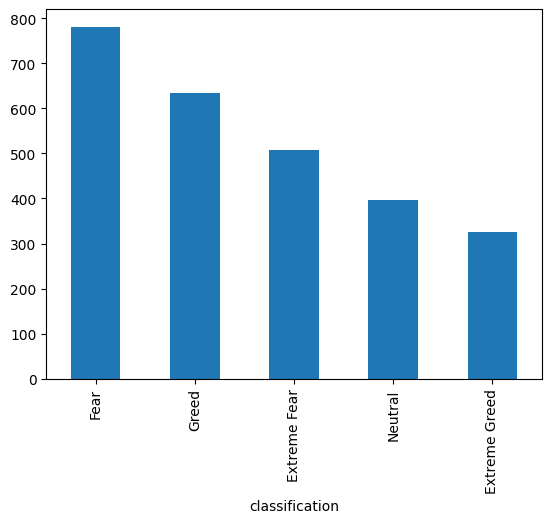

In [89]:
fear_greed['classification'].value_counts(normalize=False).plot.bar()

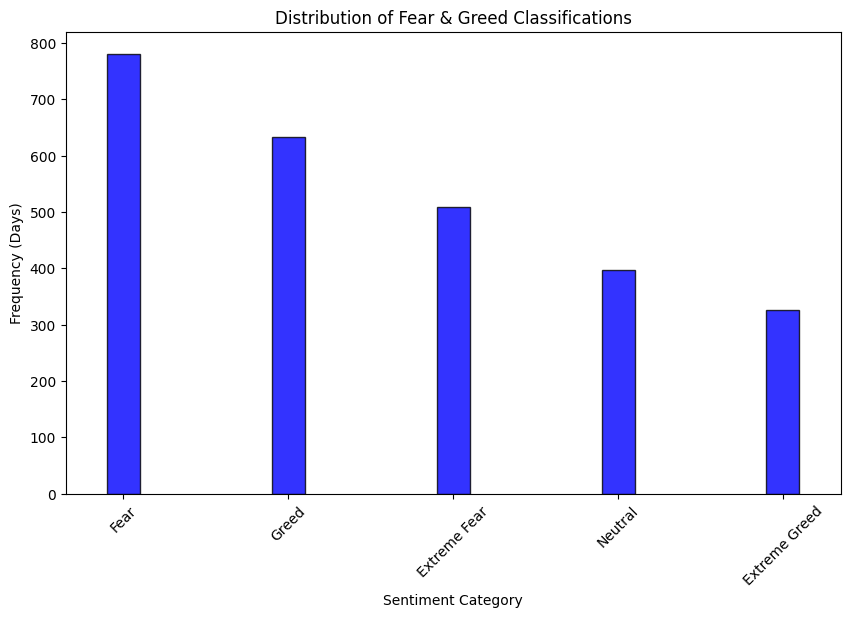

In [90]:
# Set figure size
plt.figure(figsize=(10, 6))


fear_greed['classification'].value_counts().plot.bar(
    color='b',
    edgecolor='black',
    width=0.2,
    alpha=0.8
)


plt.title('Distribution of Fear & Greed Classifications')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency (Days)')
plt.xticks(rotation=45)

# Save the plot
plt.savefig('outputs/sentiment_distribution.png')

# Show the plot
plt.show()

In [91]:
# top 5 rows of fear_greed file
print("\n fear_greed file data ",display(fear_greed.head()))
print('='*100)
print("\n historic trade  file data ",display(trades.head()))

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



 fear_greed file data  None


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



 historic trade  file data  None


In [92]:
# features of data set

print("fear_geed",fear_greed.index)
print("fear_geed",fear_greed.columns)

print("\ntrades",trades.index)
print("trades",trades.columns)

fear_geed RangeIndex(start=0, stop=2644, step=1)
fear_geed Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

trades RangeIndex(start=0, stop=211224, step=1)
trades Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [93]:
# Data preprocessing and cleanig
#  Date
fear_greed['date'] = pd.to_datetime(fear_greed['date'])
fear_greed['Date_Key'] = fear_greed['date'].dt.date


# Simplify: Fear vs Greed only
def classify(row):


  if 'Fear' in str(row) or 'Extreme Fear' in str(row):
         return 'Fear'
  else:
         return 'Greed'

fear_greed['Sentiment'] = fear_greed['classification'].apply(classify)
fear_greed['Sentiment_Value'] = fear_greed['Sentiment'].map({'Fear': -1, 'Greed': 1})
print("sample output of above function ")
display(fear_greed.head(3))

sample output of above function 


,timestamp,value,classification,date,Date_Key,Sentiment,Sentiment_Value
0,1517463000,30,Fear,2018-02-01,2018-02-01,Fear,-1
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02,Fear,-1
2,1517635800,40,Fear,2018-02-03,2018-02-03,Fear,-1


In [94]:
coin_pnl_summary = trades.groupby('Coin')['Closed PnL'].sum().reset_index()
coin_pnl_summary.columns = ['Coin', 'Total_PNL']
top_5_coins = coin_pnl_summary.sort_values(by='Total_PNL', ascending=False)
display(top_5_coins.head(5))


,Coin,Total_PNL
4,@107,2.783913e+06
137,HYPE,1.948485e+06
205,SOL,1.639556e+06
120,ETH,1.319979e+06
105,BTC,8.680447e+05


In [96]:
# Keep only BTC trades
btc_trades = trades[trades['Coin'] == 'BTC'].copy()
eth_trades = trades[trades['Coin'] == 'ETH'].copy()

# Convert time to date
btc_trades['date'] = pd.to_datetime(btc_trades['Timestamp IST']).dt.date

print(f"Bitcoin trades: {len(btc_trades):,} rows")
print(f"ETH trades: {len(eth_trades):,} rows")



Bitcoin trades: 26,064 rows
ETH trades: 11,158 rows


In [97]:
numeric_cols = ['closedPnL', 'leverage', 'size', 'execution price']
for col in numeric_cols:
    if col in trades.columns:
        trades[col] = pd.to_numeric(trades[col], errors='coerce')


In [98]:
# 3. Merge Datasets
# Convert 'Timestamp IST' in trades to datetime and create 'Date_Key'
trades['Date_Key'] = pd.to_datetime(trades['Timestamp IST'], dayfirst=True, errors='coerce').dt.date

# We merge on the Date to map Sentiment to every Trade
merged_df = pd.merge(trades, fear_greed, on='Date_Key', how='inner')

# Save intermediate file as per requirements
merged_df.to_csv('csv_files/merged_data.csv', index=False)
print("Data Merged and saved to csv_files/merged_data.csv")
print(merged_df[['Date_Key', 'classification', 'Closed PnL']].head())

Data Merged and saved to csv_files/merged_data.csv
     Date_Key classification  Closed PnL
0  2024-12-02  Extreme Greed         0.0
1  2024-12-02  Extreme Greed         0.0
2  2024-12-02  Extreme Greed         0.0
3  2024-12-02  Extreme Greed         0.0
4  2024-12-02  Extreme Greed         0.0


In [99]:
merged_df.head(2)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Fee,Trade ID,Timestamp,Date_Key,timestamp,value,classification,date,Sentiment,Sentiment_Value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,2024-12-02,Greed,1
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed,2024-12-02,Greed,1


In [100]:
merged_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'Date_Key', 'timestamp', 'value', 'classification', 'date',
       'Sentiment', 'Sentiment_Value'],
      dtype='object')

,classification,mean,median,count,sum
0,Extreme Fear,34.537862,0.0,21400,7.391102e+05
1,Extreme Greed,67.892861,0.0,39992,2.715171e+06
2,Fear,54.290400,0.0,61837,3.357155e+06
3,Greed,42.743559,0.0,50303,2.150129e+06
4,Neutral,34.307718,0.0,37686,1.292921e+06


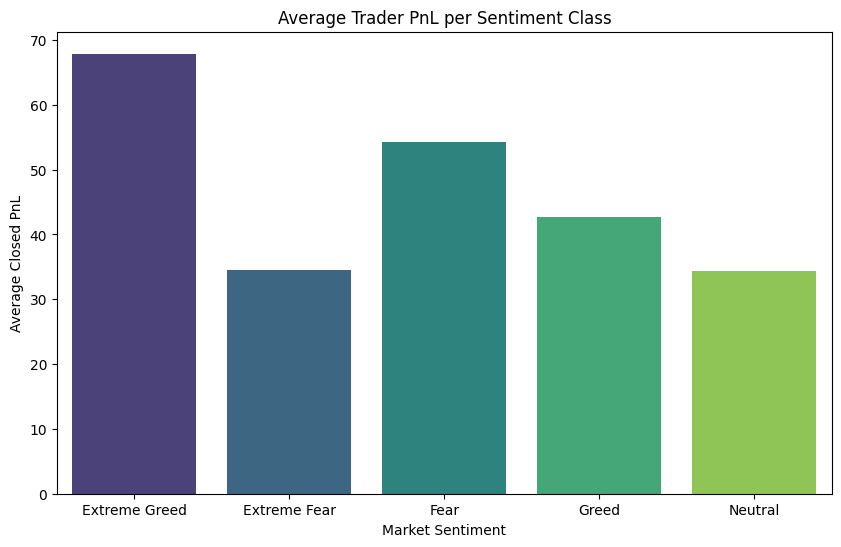

In [101]:
# Group by Sentiment Classification
pnl_analysis = merged_df.groupby('classification')['Closed PnL'].agg(['mean', 'median', 'count', 'sum']).reset_index()

display(pnl_analysis)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_df, x='classification', y='Closed PnL', estimator=np.mean, ci=None, palette='viridis')
plt.title('Average Trader PnL per Sentiment Class')
plt.ylabel('Average Closed PnL')
plt.xlabel('Market Sentiment')
plt.savefig('outputs/pnl_by_sentiment.png')
plt.show()

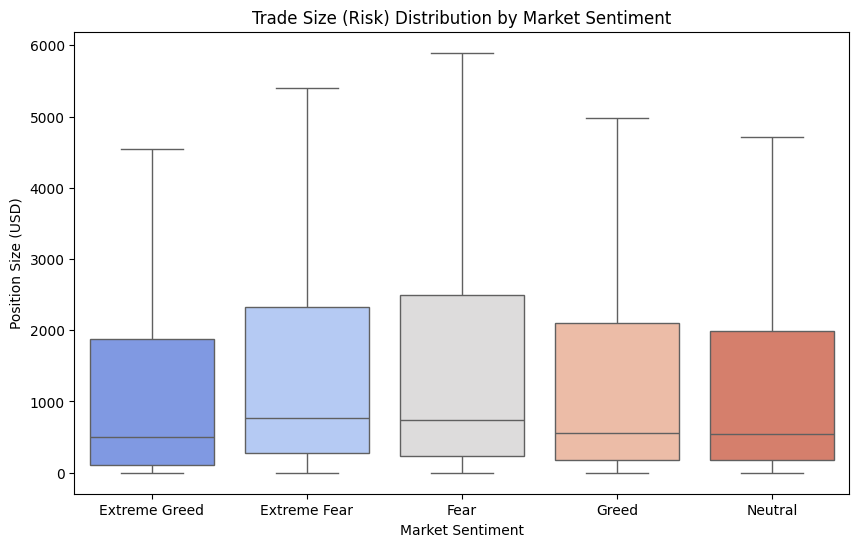

Note: Leverage column was missing, so 'Size USD' was used to analyze risk appetite.


In [102]:
# ---  RISK ANALYSIS ---


merged_df.columns = merged_df.columns.str.strip().str.lower()

# 2. Plot Position Size (Risk) vs Sentiment
plt.figure(figsize=(10, 6))

# We use 'size usd' as a proxy for Risk since 'leverage' is missing
sns.boxplot(
    data=merged_df,
    x='classification',
    y='size usd',      # Changed from 'leverage' to 'size usd'
    palette='coolwarm',
    showfliers=False   # Hides extreme outliers to make chart readable
)

plt.title('Trade Size (Risk) Distribution by Market Sentiment')
plt.ylabel('Position Size (USD)')
plt.xlabel('Market Sentiment')
plt.savefig('outputs/risk_distribution.png') # Renamed output file
plt.show()

print("Note: Leverage column was missing, so 'Size USD' was used to analyze risk appetite.")

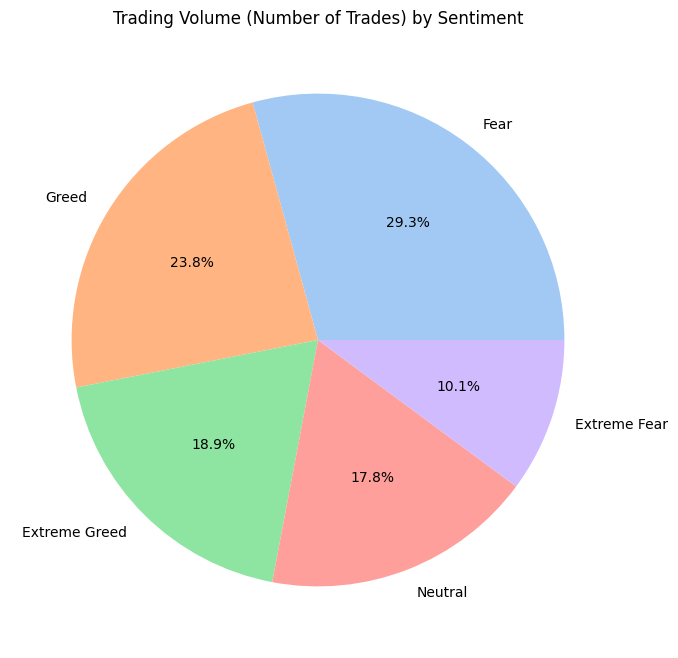

In [103]:
# Count number of trades per sentiment
trade_counts = merged_df['classification'].value_counts().reset_index()
trade_counts.columns = ['classification', 'Trade_Count']

plt.figure(figsize=(8, 8))
plt.pie(trade_counts['Trade_Count'], labels=trade_counts['classification'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Trading Volume (Number of Trades) by Sentiment')
plt.savefig('outputs/volume_by_sentiment.png')
plt.show()

In [104]:
merged_df.columns

Index(['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side',
       'timestamp ist', 'start position', 'direction', 'closed pnl',
       'transaction hash', 'order id', 'crossed', 'fee', 'trade id',
       'timestamp', 'date_key', 'timestamp', 'value', 'classification', 'date',
       'sentiment', 'sentiment_value'],
      dtype='object')

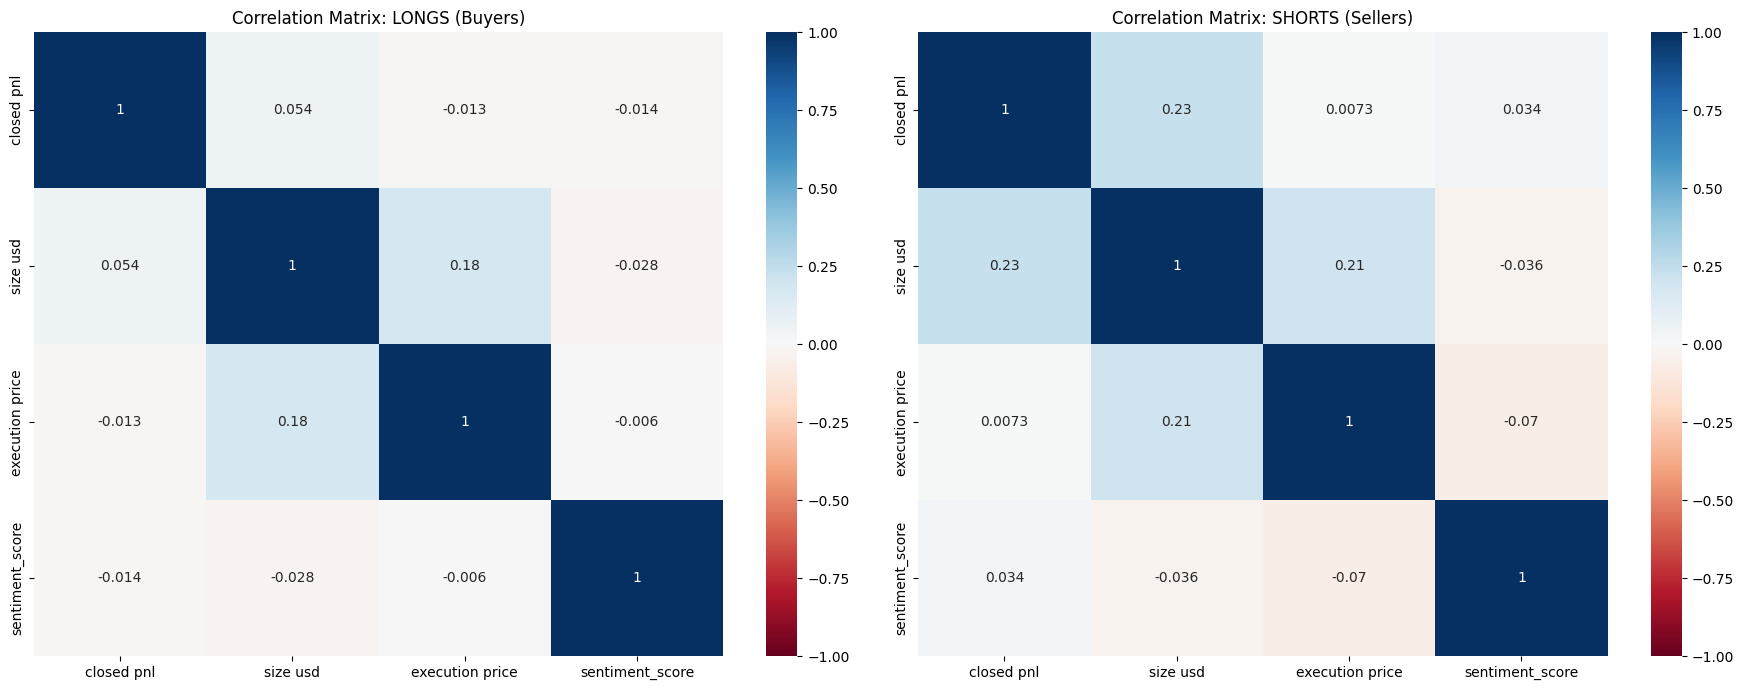

In [105]:
# --- DUAL HEATMAp---

# 1. Prepare the Data
analysis_df = merged_df.copy()

# Encode Sentiment to Numbers (0-4)
sentiment_mapping = {
    'Extreme Fear': 0, 'Fear': 1, 'Neutral': 2, 'Greed': 3, 'Extreme Greed': 4
}
if 'classification' in analysis_df.columns:
    analysis_df['sentiment_score'] = analysis_df['classification'].map(sentiment_mapping)

# Standardize 'side' column (Handle variations like 'BUY'/'LONG')
analysis_df['side'] = analysis_df['side'].str.upper().str.strip()

#  Split Data into Longs (Buys) and Shorts (Sells)
# Adjust these strings based on your actual CSV values (e.g., 'BUY', 'LONG', 'BID')
longs_df = analysis_df[analysis_df['side'].isin(['BUY', 'LONG'])]
shorts_df = analysis_df[analysis_df['side'].isin(['SELL', 'SHORT'])]

#  Select Columns for Correlation
# We use 'size usd' because leverage is missing
cols_to_corr = ['closed pnl', 'size usd', 'execution price', 'sentiment_score']

#  Plotting Side-by-Side Heatmaps
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- Plot 1: LONGS (Buyers) ---
if not longs_df.empty:
    sns.heatmap(longs_df[cols_to_corr].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1, ax=axes[0])
    axes[0].set_title('Correlation Matrix: LONGS (Buyers)')
else:
    axes[0].text(0.5, 0.5, "No Long Data Found", ha='center')

# --- SHORTS (Sellers) ---
if not shorts_df.empty:
    sns.heatmap(shorts_df[cols_to_corr].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1, ax=axes[1])
    axes[1].set_title('Correlation Matrix: SHORTS (Sellers)')
else:
    axes[1].text(0.5, 0.5, "No Short Data Found", ha='center')

plt.tight_layout()
plt.savefig('outputs/dual_side_correlation.png')
plt.show()

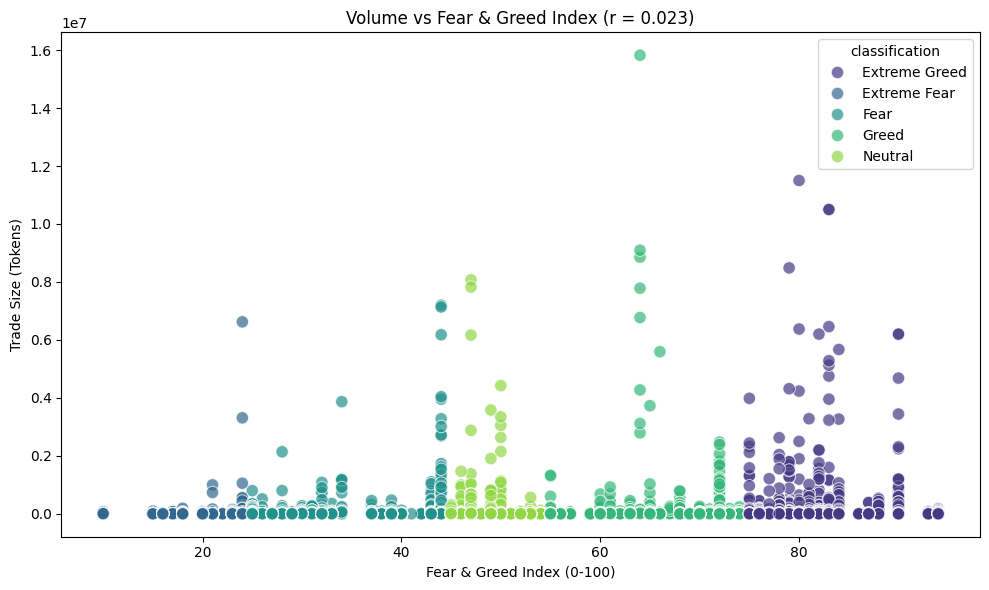

In [106]:
# 1. Calculate the specific correlation coefficient for these two columns
# We use .corr() to get the single number (r)
correlation_val = merged_df['value'].corr(merged_df['size tokens'])

# 2. Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x='value',
    y='size tokens',
    hue='classification',
    palette="viridis",
    s=80,
    alpha=0.7
)

# 3. Use the calculated variable 'correlation_val' in the title
plt.title(f'Volume vs Fear & Greed Index (r = {correlation_val:.3f})')
plt.xlabel('Fear & Greed Index (0-100)')
plt.ylabel('Trade Size (Tokens)')
plt.tight_layout()
plt.savefig('outputs/volume_vs_fg_scatter.png')
plt.show()

In [107]:
# Assuming 'side' column exists and contains 'BUY'/'SELL'
merged_df['side'] = merged_df['side'].str.upper()

# Calculate Long/Short Ratio per Sentiment
bias_analysis = merged_df.groupby(['classification', 'side']).size().unstack(fill_value=0)
bias_analysis['Total'] = bias_analysis.sum(axis=1)
# Assuming sides are 'BUY' and 'SELL' (Adjust based on actual CSV data)
if 'BUY' in bias_analysis.columns:
    bias_analysis['Long_Ratio'] = bias_analysis['BUY'] / bias_analysis['Total']
elif 'LONG' in bias_analysis.columns:
    bias_analysis['Long_Ratio'] = bias_analysis['LONG'] / bias_analysis['Total']

print(bias_analysis)

# Save summary stats
bias_analysis.to_csv('csv_files/summary_stats.csv')

side              BUY   SELL  Total  Long_Ratio
classification                                 
Extreme Fear    10935  10465  21400    0.510981
Extreme Greed   17940  22052  39992    0.448590
Fear            30270  31567  61837    0.489513
Greed           24576  25727  50303    0.488559
Neutral         18969  18717  37686    0.503343
